# LAB 1

Step 1 - Import Library

In [ ]:
# Import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Step 2 - Load Data and Inspection

In [ ]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Step 3 - Features Selection

In [ ]:
# Features Selection
X = df.iloc[:, 1:-1] # slice the features
y = df.iloc[:, -1] # this is the labels (we don't need it)

In [ ]:
print(X.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


Step 4 - Plotting

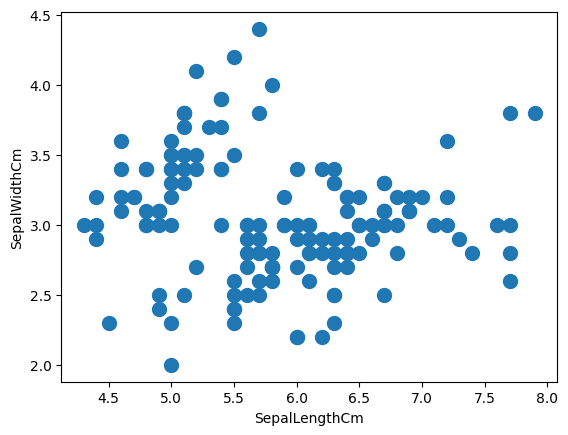

In [ ]:
# Make a scatterplot using
# SepalLengthCm and SepalWidthCm
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

Step 5 - Build K-Means Model

In [ ]:
# Build a K-Means Model
# Based on visual inspection using scatterplot,
# we can assumpt that the data has 2 cluster
# (even though, from the label, there are 3 labels in this data)

from sklearn.cluster import KMeans

# Initiate K-Means object with numbur of cluster is 2
cl_kmeans = KMeans(n_clusters=2)

# Fit and predict
y_kmeans = cl_kmeans.fit_predict(X)

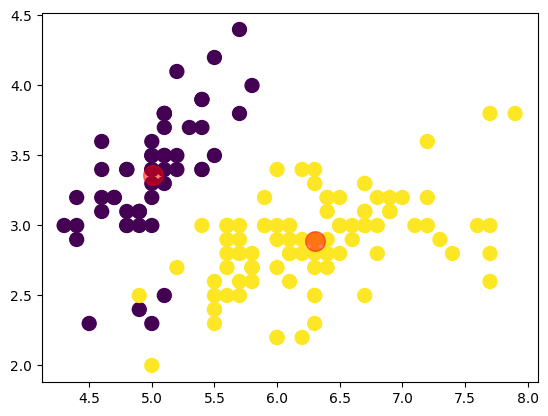

In [ ]:
# Plot the clustering result
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot the centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

Step 6 - Model Evaluation

In [ ]:
# Print SSE value
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


Step 7 - Find The Best
k
k Using Elbow Method

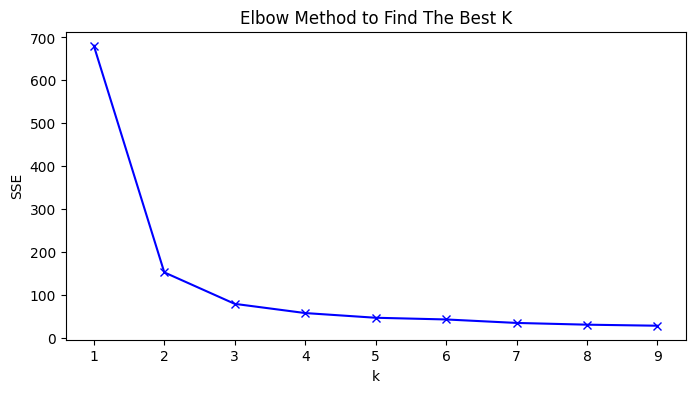

In [ ]:
# Find the best k
# using Elbow Method

# List SSE values
sse = []

# Build k range from 1 to 9
K = range(1,10)

# Find the SSE value for each k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K")
plt.show()

#LAB 2

Step 0 - Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Step 1 - Build Synthetic Data

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.05, random_state=0)

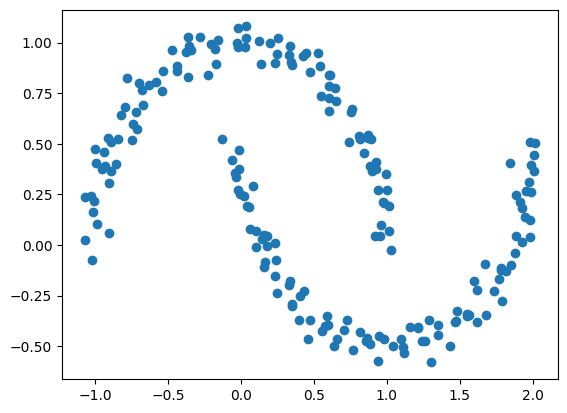

In [ ]:
plt.scatter(X[:, 0], X[:, 1])

Step 2 - Clustering Using K-Means

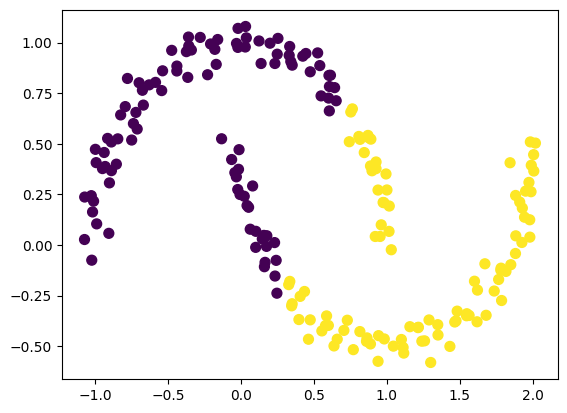

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(2, random_state=0)
cluster = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster, s=50, cmap='viridis')

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster))

0.49215648268306905


Step 3 - Clustering Using DBSCAN

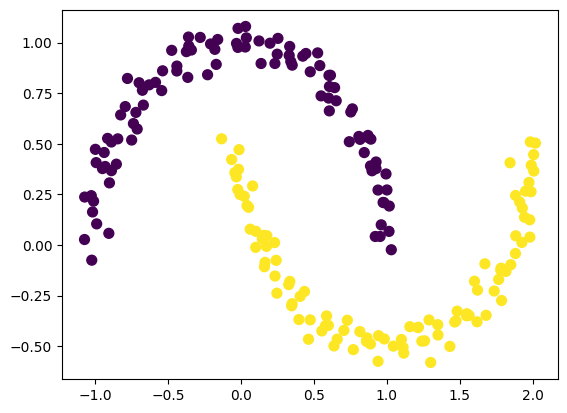

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=2)
cluster_db = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster_db, s=50, cmap='viridis')

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster_db))

# Result: 0.32585318950197517

0.32585318950197517


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Compute and print Davies-Bouldin Index
db = davies_bouldin_score(X, cluster_db)

print(f"Davies-Bouldin Index: {db}")

# Result
# Davies-Bouldin Index: 1.1622685374061352

Davies-Bouldin Index: 1.1622685374061352


#LAB 3

Step 0 - Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Step 1 - Load The Data

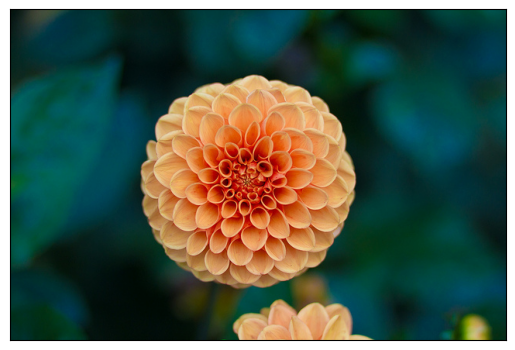

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

Step 2 - Preprocessing

In [ ]:
# Check shape
print(flower.shape)

# Normalize color
data = flower / 255.0

# Reshape
data = data.reshape(427 * 640, 3) # turn to 1D

print(data.shape)

(427, 640, 3)
(273280, 3)


Step 3 - Check Color Distribution

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

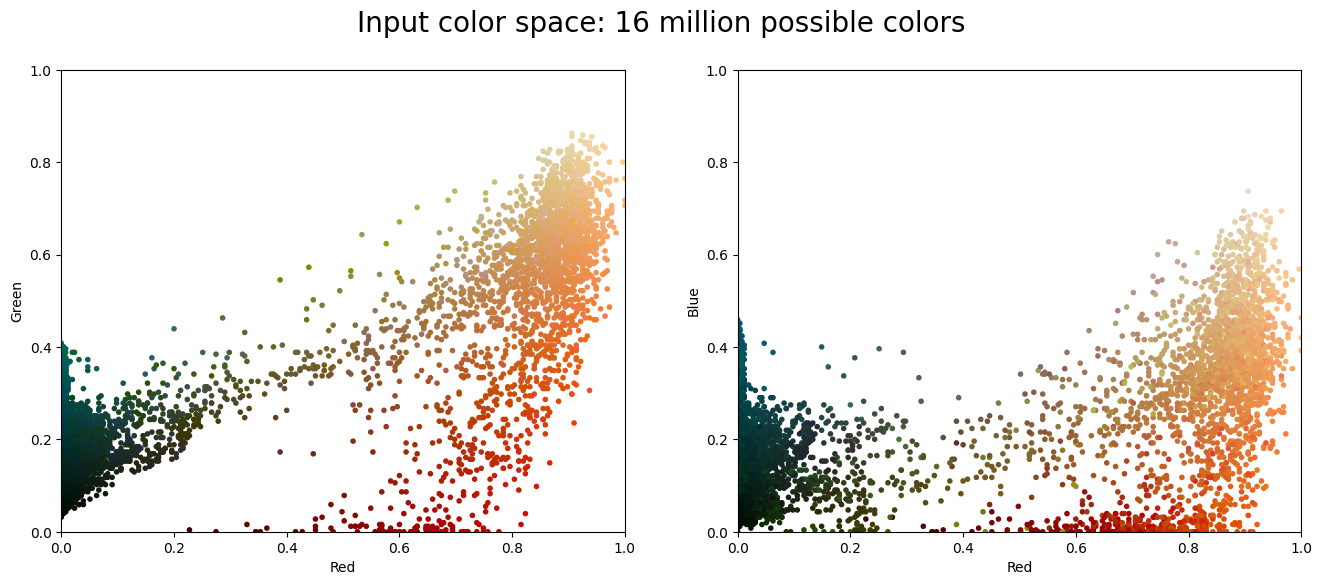

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

Step 4 - Color Clustering Based on Similarity

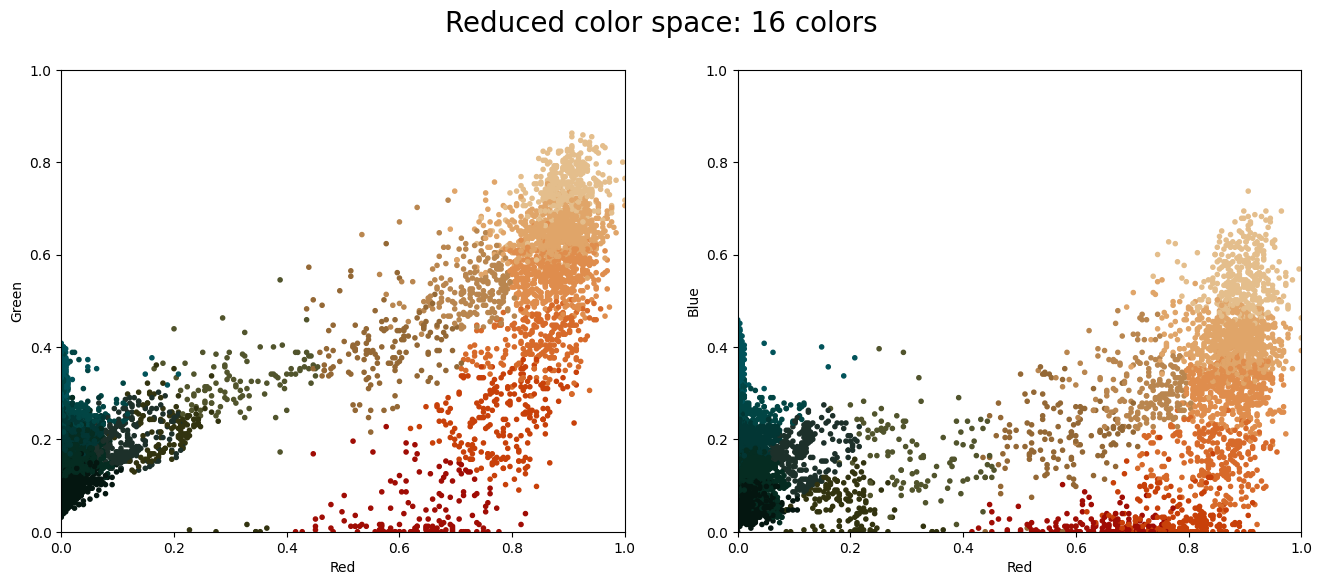

In [ ]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

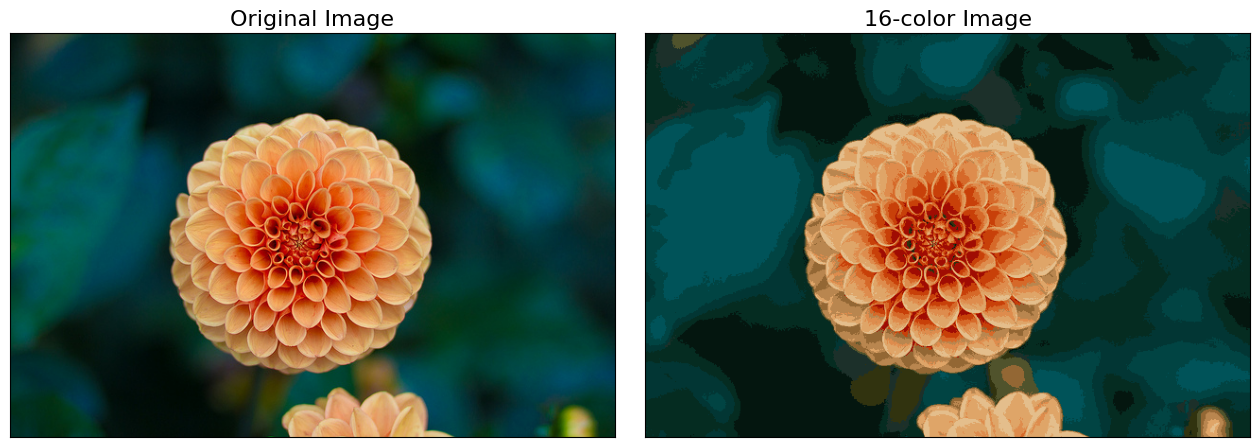

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

#Lab Assignment

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("CC_Customer_Dataset.csv")
print("Dataset shape:", df.shape)
print("Columns:", list(df.columns))

# Pilih numeric columns
numeric = df.select_dtypes(include=[np.number]).copy().dropna()
print("Numeric columns used for clustering:", list(numeric.columns))

Dataset shape: (660, 7)
Columns: ['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
Numeric columns used for clustering: ['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']



1. Create a scatter plot from the dataset using two variables, Avg_Credit_Limit and Total_Credit_Card. Determine whether the data distribution can be considered linear

Pearson r between Avg_Credit_Limit and Total_Credit_Cards: 0.609


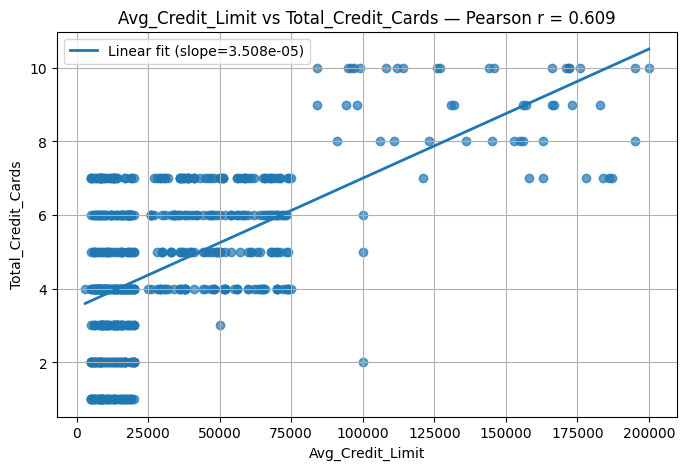

Interpretation: moderate linear relationship.


In [ ]:
# 1) Scatter & Pearson correlation
x_col = "Avg_Credit_Limit"
y_col = "Total_Credit_Cards"

if x_col not in numeric.columns or y_col not in numeric.columns:
    raise KeyError(f"Kolom '{x_col}' dan/atau '{y_col}' tidak ditemukan. Tersedia: {list(numeric.columns)}")

x = numeric[x_col].values
y = numeric[y_col].values

# Pearson
pearson_r = np.corrcoef(x, y)[0,1]
print(f"Pearson r between {x_col} and {y_col}: {pearson_r:.3f}")

# Scatter + linear fit
plt.figure(figsize=(8,5))
plt.scatter(x, y, alpha=0.7)
coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef)
xs = np.linspace(x.min(), x.max(), 200)
plt.plot(xs, poly1d_fn(xs), linewidth=2, label=f"Linear fit (slope={coef[0]:.3e})")
plt.xlabel(x_col); plt.ylabel(y_col)
plt.title(f"{x_col} vs {y_col} — Pearson r = {pearson_r:.3f}")
plt.legend(); plt.grid(True); plt.show()

# Interpretation text minimal
if abs(pearson_r) >= 0.7:
    print("Interpretation: strong linear relationship.")
elif abs(pearson_r) >= 0.4:
    print("Interpretation: moderate linear relationship.")
else:
    print("Interpretation: weak or no linear relationship.")


2. Build a clustering model using K-Means. Determine the optimal number of clusters (k) using the Elbow Method. Support your analysis with a line chart and an explanation of why you chose that value.

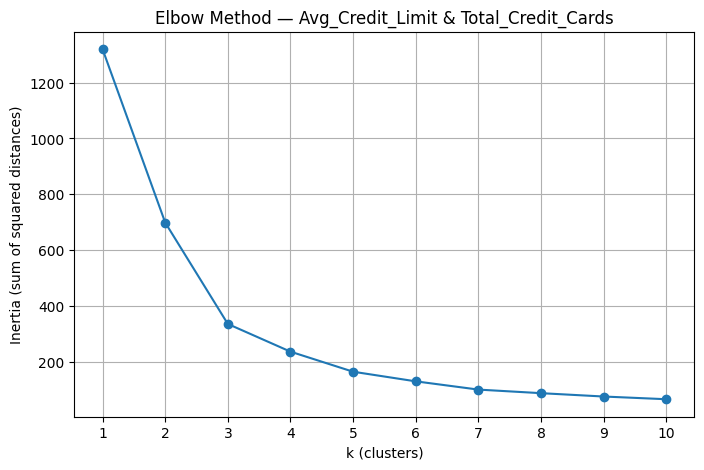

Inertias: [1320.0, 698.29, 334.72, 235.39, 163.47, 128.96, 99.37, 86.53, 74.53, 64.83]
k=1, relative drop from previous: 0.000
k=2, relative drop from previous: 0.471
k=3, relative drop from previous: 0.521
k=4, relative drop from previous: 0.297
k=5, relative drop from previous: 0.306
k=6, relative drop from previous: 0.211
k=7, relative drop from previous: 0.229
k=8, relative drop from previous: 0.129
k=9, relative drop from previous: 0.139
k=10, relative drop from previous: 0.130
Chosen k (2 vars) = 3


In [ ]:
# 2) K-Means on the two variables + Elbow method
from sklearn.cluster import KMeans

XY = numeric[[x_col, y_col]].values
scaler_2 = StandardScaler()
XY_scaled = scaler_2.fit_transform(XY)

inertias = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(XY_scaled)
    inertias.append(km.inertia_)

# Plot elbow
plt.figure(figsize=(8,5))
plt.plot(list(K_range), inertias, marker='o')
plt.xticks(list(K_range))
plt.xlabel("k (clusters)")
plt.ylabel("Inertia (sum of squared distances)")
plt.title("Elbow Method — Avg_Credit_Limit & Total_Credit_Cards")
plt.grid(True); plt.show()

# Print inertias + simple drop heuristic (percent drop)
print("Inertias:", [float(f"{v:.2f}") for v in inertias])
drops = [0] + [ (inertias[i-1]-inertias[i]) / inertias[i-1] if inertias[i-1] > 0 else 0 for i in range(1,len(inertias))]
for k, d in zip(K_range, drops):
    print(f"k={k}, relative drop from previous: {d:.3f}")

# Heuristic: pilih k (ubah jika mau)
k_chosen_2vars = 3
print(f"Chosen k (2 vars) = {k_chosen_2vars}")

# Fit chosen model and store labels
km2 = KMeans(n_clusters=k_chosen_2vars, random_state=42, n_init=20)
labels_k2 = km2.fit_predict(XY_scaled)


3. Visualize the clustering results from the K-Means model using a scatter plot.

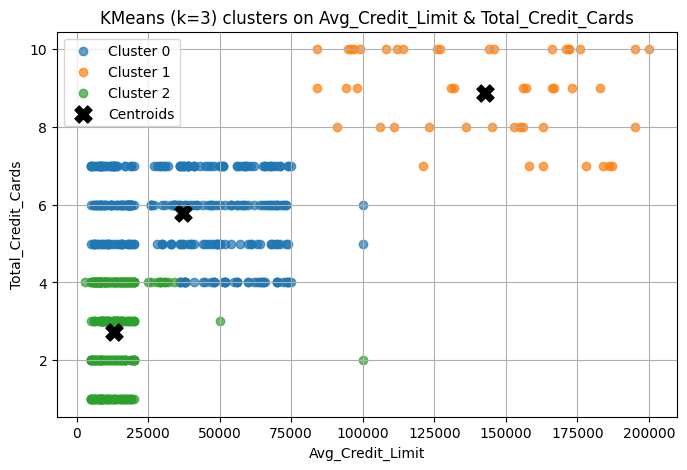

In [ ]:
# 3) Scatter plot clustering results for KMeans (2 vars)
plt.figure(figsize=(8,5))
for lab in np.unique(labels_k2):
    mask = labels_k2 == lab
    plt.scatter(XY[mask,0], XY[mask,1], label=f"Cluster {lab}", alpha=0.7)
# plot centroids (inverse transform to original scale for clarity)
centers_scaled = km2.cluster_centers_
centers_orig = scaler_2.inverse_transform(centers_scaled)
plt.scatter(centers_orig[:,0], centers_orig[:,1], marker='X', s=150, c='black', label='Centroids')
plt.xlabel(x_col); plt.ylabel(y_col)
plt.title(f"KMeans (k={k_chosen_2vars}) clusters on {x_col} & {y_col}")
plt.legend(); plt.grid(True); plt.show()


4. Build a clustering model using DBSCAN with all available variables.

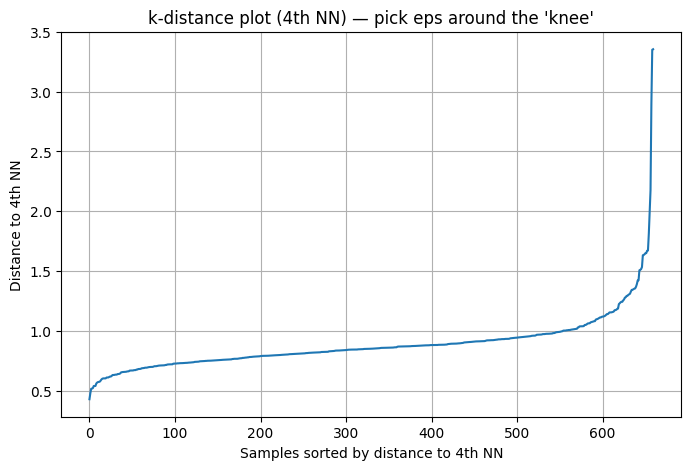

eps=0.5: clusters=0, noise=660
eps=0.8: clusters=24, noise=343
eps=1.0: clusters=2, noise=65
eps=1.2: clusters=3, noise=34
eps=1.5: clusters=2, noise=13

Chosen DBSCAN eps=1.0 -> clusters=2, noise points=65


In [ ]:
# 4) DBSCAN on all numeric variables
all_numeric = numeric.copy()
X_all = all_numeric.values
scaler_all = StandardScaler()
X_all_scaled = scaler_all.fit_transform(X_all)

# k-distance plot (k = min_samples-1 typical; use 4)
nn = NearestNeighbors(n_neighbors=4).fit(X_all_scaled)
distances, _ = nn.kneighbors(X_all_scaled)
k_dist = np.sort(distances[:, -1])

plt.figure(figsize=(8,5))
plt.plot(k_dist)
plt.title("k-distance plot (4th NN) — pick eps around the 'knee'")
plt.xlabel("Samples sorted by distance to 4th NN")
plt.ylabel("Distance to 4th NN")
plt.grid(True); plt.show()

# Try several eps candidates quickly
eps_candidates = [0.5, 0.8, 1.0, 1.2, 1.5]
dbscan_trials = {}
for eps in eps_candidates:
    db = DBSCAN(eps=eps, min_samples=5)
    labs = db.fit_predict(X_all_scaled)
    n_clusters = len(set(labs)) - (1 if -1 in labs else 0)
    n_noise = int((labs == -1).sum())
    dbscan_trials[eps] = {"n_clusters": n_clusters, "n_noise": n_noise}
    print(f"eps={eps}: clusters={n_clusters}, noise={n_noise}")

# Pilih satu eps untuk analisa (ubah sesuai k-distance plot)
eps_chosen = 1.0
db_final = DBSCAN(eps=eps_chosen, min_samples=5)
labels_db = db_final.fit_predict(X_all_scaled)
n_clusters_db = len(set(labels_db)) - (1 if -1 in labels_db else 0)
n_noise_db = int((labels_db == -1).sum())
print(f"\nChosen DBSCAN eps={eps_chosen} -> clusters={n_clusters_db}, noise points={n_noise_db}")


5. Determine the optimal number of clusters (k) using the Elbow Method. Support your analysis with a line chart and an explanation of why you chose that value.

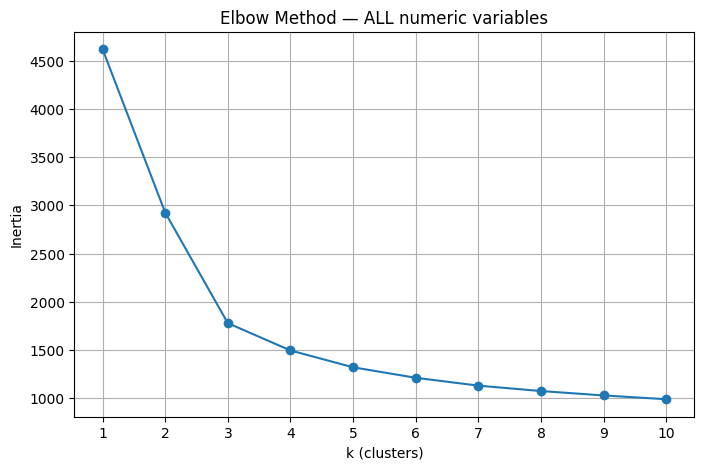

Inertia (all vars): [4620.0, 2924.52, 1777.2, 1493.91, 1319.22, 1210.42, 1128.91, 1072.89, 1027.12, 987.97]
k=1, relative drop: 0.000
k=2, relative drop: 0.367
k=3, relative drop: 0.392
k=4, relative drop: 0.159
k=5, relative drop: 0.117
k=6, relative drop: 0.082
k=7, relative drop: 0.067
k=8, relative drop: 0.050
k=9, relative drop: 0.043
k=10, relative drop: 0.038
Chosen k (all vars) = 4


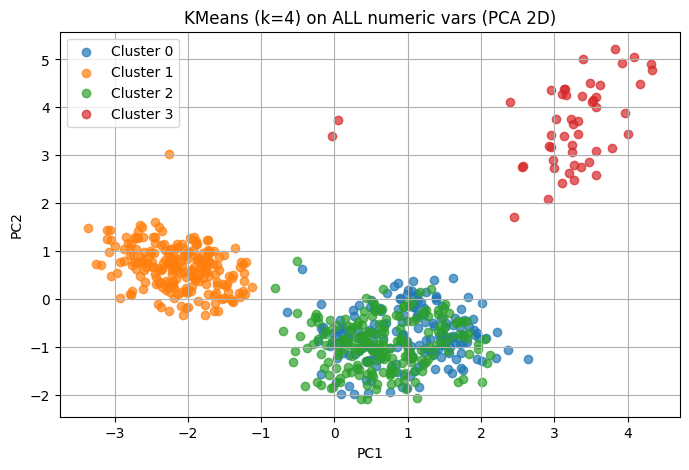

In [ ]:
# 5) Elbow method using ALL numeric variables (KMeans)
inertias_all = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_all_scaled)
    inertias_all.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(list(K_range), inertias_all, marker='o')
plt.xticks(list(K_range))
plt.xlabel("k (clusters)")
plt.ylabel("Inertia")
plt.title("Elbow Method — ALL numeric variables")
plt.grid(True); plt.show()

print("Inertia (all vars):", [float(f"{v:.2f}") for v in inertias_all])
drops_all = [0] + [ (inertias_all[i-1]-inertias_all[i]) / inertias_all[i-1] if inertias_all[i-1] > 0 else 0 for i in range(1,len(inertias_all))]
for k, d in zip(K_range, drops_all):
    print(f"k={k}, relative drop: {d:.3f}")

# Heuristic choice (ubah sesuai grafik) — contoh saya pilih k=4
k_chosen_all = 4
print("Chosen k (all vars) =", k_chosen_all)

# Fit and visualize with PCA (2D)
km_all = KMeans(n_clusters=k_chosen_all, random_state=42, n_init=20)
labels_k_all = km_all.fit_predict(X_all_scaled)

pca = PCA(n_components=2)
pc2 = pca.fit_transform(X_all_scaled)
plt.figure(figsize=(8,5))
for lab in np.unique(labels_k_all):
    plt.scatter(pc2[labels_k_all==lab,0], pc2[labels_k_all==lab,1], alpha=0.7, label=f"Cluster {lab}")
plt.title(f"KMeans (k={k_chosen_all}) on ALL numeric vars (PCA 2D)")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.legend(); plt.grid(True); plt.show()


6. Calculate the silhouette score and Davies–Bouldin Index (DBI) for the DBSCAN model.

In [ ]:
# 6) Compute silhouette score and Davies-Bouldin Index for DBSCAN (exclude noise)
mask = labels_db != -1
n_clusters_db = len(set(labels_db)) - (1 if -1 in labels_db else 0)
if n_clusters_db <= 1:
    print("DBSCAN found less than 2 clusters (excluding noise). Silhouette and DBI cannot be computed reliably.")
    silhouette_db = None
    dbi_db = None
else:
    silhouette_db = silhouette_score(X_all_scaled[mask], labels_db[mask])
    dbi_db = davies_bouldin_score(X_all_scaled[mask], labels_db[mask])
    print(f"DBSCAN (eps={eps_chosen}) silhouette: {silhouette_db:.4f}")
    print(f"DBSCAN (eps={eps_chosen}) Davies-Bouldin Index: {dbi_db:.4f}")


DBSCAN (eps=1.0) silhouette: 0.5390
DBSCAN (eps=1.0) Davies-Bouldin Index: 0.4758
